## Vizualizar médias e gráficos das métricas por pasta

In [1]:
# Escolher pasta a ser analisada
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# results_dir = '../results/paper/dual-base-emb'
# results_dir = '../results/paper/dual-base'
# results_dir = '../results/paper-validation/validation/models'
results_dir = '../results/paper/parameters-llama-multilingual'

In [2]:
metrics_to_display = ["perplexity_accuracy", "mca_v2_cot_no_context", "da_cot_10"]

In [3]:
results = []
dirs = os.listdir(results_dir)
dirs.sort()
# para cada pasta dentro do results dir
for folder in dirs:
    # se for uma pasta
    if os.path.isdir(os.path.join(results_dir, folder)):
        print(folder)
        # para cada csv dentro da pasta
        for file in os.listdir(os.path.join(results_dir, folder)):
            if file.endswith('.csv') and file != 'results_metrics.csv':
                # ler csv
                df = pd.read_csv(os.path.join(results_dir, folder, file))
                folder_results = {
                    "name": folder + "/" + file
                }
                for metric in metrics_to_display:
                    if metric in df.columns:
                        folder_results[metric] = df[metric].mean()
                # adicionar ao dicionário
                results.append(folder_results)
    else:
        file = folder
        if file.endswith('.csv') and file != 'results_metrics.csv':
                # ler csv
                df = pd.read_csv(os.path.join(results_dir, file))
                folder_results = {
                    "name": folder + "/" + file
                }
                for metric in metrics_to_display:
                    if metric in df.columns:
                        folder_results[metric] = df[metric].mean()
                # adicionar ao dicionário
                results.append(folder_results)


results_df = pd.DataFrame(results)

cvpr-papers-100-0
cvpr-papers-100-25
cvpr-papers-100-50
cvpr-papers-100-75
cvpr-papers-1000-0
cvpr-papers-1000-25
cvpr-papers-1000-50
cvpr-papers-1000-75
cvpr-papers-500-0
cvpr-papers-500-25
cvpr-papers-500-50
cvpr-papers-500-75
cvpr-papers-5000-0
cvpr-papers-5000-25
cvpr-papers-5000-50
cvpr-papers-5000-75


In [4]:
results_df

,name,da_cot_10
0,cvpr-papers-100-0/outputs_rag_df_golden_questi...,0.408207
1,cvpr-papers-100-25/outputs_rag_df_golden_quest...,0.412527
2,cvpr-papers-100-50/outputs_rag_df_golden_quest...,0.421166
3,cvpr-papers-100-75/outputs_rag_df_golden_quest...,0.490281
4,cvpr-papers-1000-0/outputs_rag_df_golden_quest...,0.574514
5,cvpr-papers-1000-25/outputs_rag_df_golden_ques...,0.598272
6,cvpr-papers-1000-50/outputs_rag_df_golden_ques...,0.634989
7,cvpr-papers-1000-75/outputs_rag_df_golden_ques...,0.619870
8,cvpr-papers-500-0/outputs_rag_df_golden_questi...,0.624190
9,cvpr-papers-500-25/outputs_rag_df_golden_quest...,0.563715


## Plot Gen Models

In [5]:
df = results_df

# Gen model
df['model'] = df['name'].str.extract(r'cvpr-papers-(\w+)/')
df['use_rag'] = df['name'].str.contains('outputs_rag').astype(bool)
df['Accuracy'] = df['da_cot_10']

# Embedding model
# df['model'] = df['name'].str.extract(r'cvpr-papers-mistral-([\w-]+)/')
# df['rag_bool'] = True

df

,name,da_cot_10,model,use_rag,Accuracy
0,cvpr-papers-100-0/outputs_rag_df_golden_questi...,0.408207,NaN,True,0.408207
1,cvpr-papers-100-25/outputs_rag_df_golden_quest...,0.412527,NaN,True,0.412527
2,cvpr-papers-100-50/outputs_rag_df_golden_quest...,0.421166,NaN,True,0.421166
3,cvpr-papers-100-75/outputs_rag_df_golden_quest...,0.490281,NaN,True,0.490281
4,cvpr-papers-1000-0/outputs_rag_df_golden_quest...,0.574514,NaN,True,0.574514
5,cvpr-papers-1000-25/outputs_rag_df_golden_ques...,0.598272,NaN,True,0.598272
6,cvpr-papers-1000-50/outputs_rag_df_golden_ques...,0.634989,NaN,True,0.634989
7,cvpr-papers-1000-75/outputs_rag_df_golden_ques...,0.619870,NaN,True,0.619870
8,cvpr-papers-500-0/outputs_rag_df_golden_questi...,0.624190,NaN,True,0.624190
9,cvpr-papers-500-25/outputs_rag_df_golden_quest...,0.563715,NaN,True,0.563715


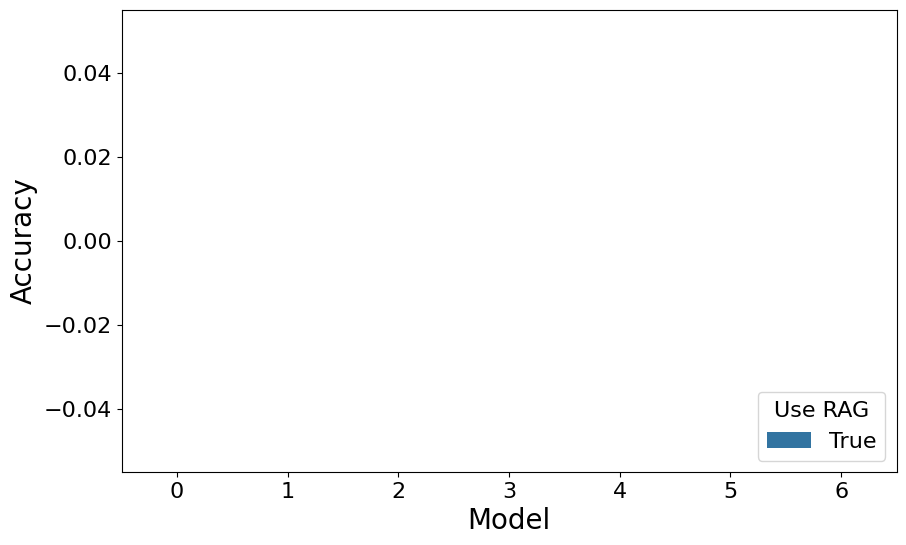

In [6]:
# Plot barplot model with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='Accuracy', hue='use_rag', data=df)
# Increase font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Increase label size
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
# Increase legend size with title "Use RAG"
plt.legend(title='Use RAG', title_fontsize=16, fontsize=16, loc='lower right')

## Plot Parameters

In [7]:
# Plot chunks and overlap
# Extracting chunk_size and overlap using regex
df = results_df
df['chunk_size'] = df['name'].str.extract(r'cvpr-papers-(\d+)-\d+/')
df['overlap'] = df['name'].str.extract(r'cvpr-papers-\d+-(\d+)/')

# Converting to integers
df['chunk_size'] = df['chunk_size'].astype(int)
df['overlap'] = df['overlap'].astype(int)

(0.3, 0.9)

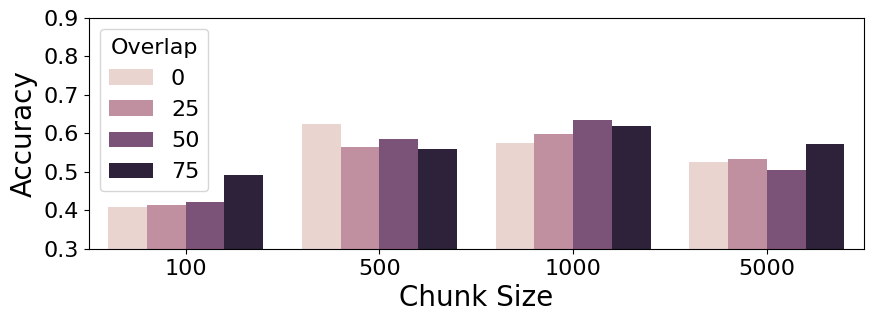

In [8]:
# Plot barplot chunks with seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x='chunk_size', y='da_cot_10', hue='overlap', data=df)
# Increase font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Increase label size
plt.xlabel('Chunk Size', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
# Increase legend size with title "Overlap"
plt.legend(title='Overlap', title_fontsize=16, fontsize=16, loc='upper left')

plt.ylim(0.3, 0.9)

<Axes: xlabel='overlap', ylabel='da_cot_10'>

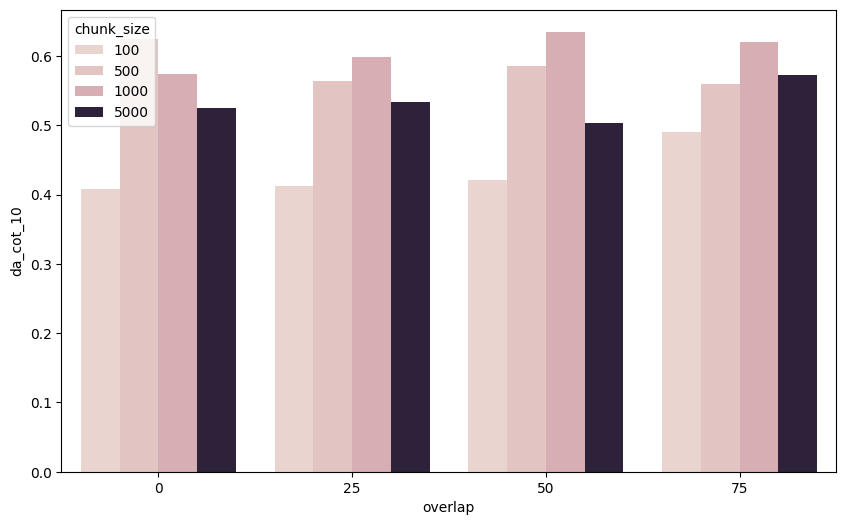

In [9]:
# Plot barplot overlap with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='overlap', y='da_cot_10', hue='chunk_size', data=df)

## Plot Abstract x Not Abstract

In [49]:
df = results_df
df = pd.concat([df, pd.DataFrame({"name": ["paper"], "da_cot_10": [0.659459]})], ignore_index=True)
# Abstract data
df['rag_source'] = ['abstract', 'none', 'paper text']
df

,name,perplexity_accuracy,da_cot_10,rag_source
0,outputs_rag_validation.csv/outputs_rag_validat...,0.886486,0.832432,abstract
1,outputs_no_rag_validation.csv/outputs_no_rag_v...,0.329730,0.172973,none
2,paper,NaN,0.659459,paper text


<Axes: xlabel='rag_source', ylabel='da_cot_10'>

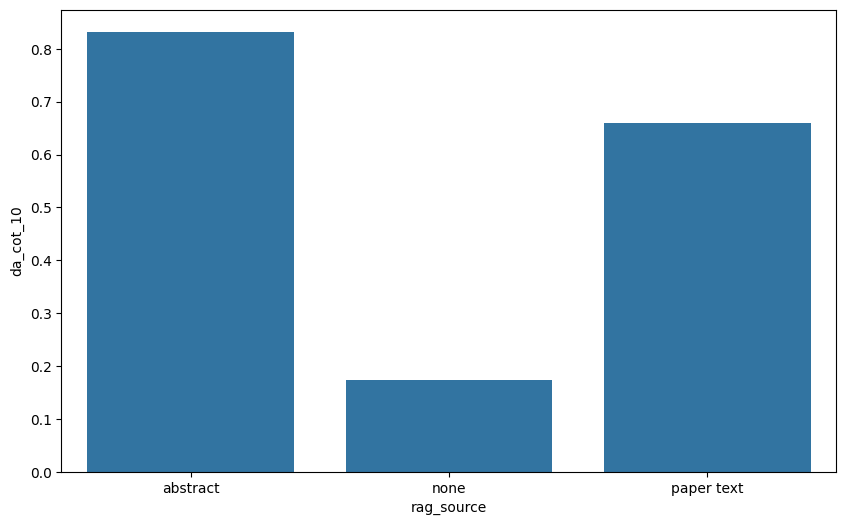

In [50]:
# Plot bar
plt.figure(figsize=(10, 6))
sns.barplot(x='rag_source', y='da_cot_10', data=df)